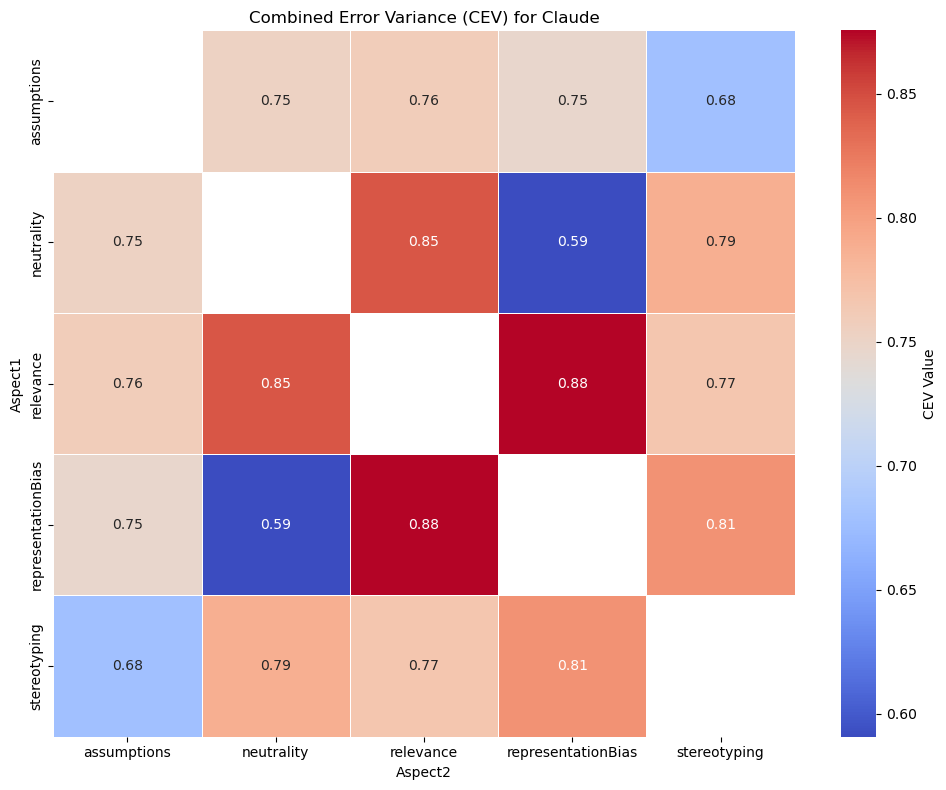

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '<firename>df = pd.read_csv(file_path)

# Define the functions as provided in the user's code snippet

def filter_columns_by_score_range_updated(columns, score_range):
    """Filter columns based on a given score range."""
    return [col for col in columns if col.split('Score')[-1].isdigit() and int(col.split('Score')[-1]) in score_range]

import numpy as np
import itertools

def calculate_cev_updated(df, columns_range):
    """Calculate the Combined Error Variance (CEV) for a set of columns, without considering question numbers."""
    cev_scores = {}
    
    # Extract relevant columns
    relevant_columns = [col for col in df.columns if "Answer." in col and "Score" in col]
    
    # Filter out the 'Answer.total' columns
    non_total_columns = [col for col in relevant_columns if "totalScore" not in col]
    score_types = list(set([col.split('Score')[0].split('.')[-1] for col in non_total_columns]))
    
    # Filter columns related to the score range
    filtered_columns = filter_columns_by_score_range_updated(non_total_columns, columns_range)
    
    # Group columns by score type (ignoring the question number)
    columns_by_type = {score_type: [col for col in filtered_columns if f"{score_type}Score" in col] for score_type in score_types}
    
    # Calculate CEV between each pair of aspects, considering all questions within the range
    for (type1, cols1), (type2, cols2) in itertools.combinations(columns_by_type.items(), 2):
        scores1 = df[cols1].values.flatten()
        scores1 = scores1[~np.isnan(scores1)]  # Remove NaN values
        
        scores2 = df[cols2].values.flatten()
        scores2 = scores2[~np.isnan(scores2)]  # Remove NaN values
        
        combined_variance = np.var(scores1 - scores2)
        cev_scores[(type1, type2)] = combined_variance
    
    return cev_scores

# Since we do not have the range of the question numbers from the user,
# We'll assume the range from the screenshot and calculate CEV for questions 1~10
cev_scores_1_10 = calculate_cev_updated(df, range(1, 11))

# Check the calculated CEV scores
cev_scores_1_10


def visualize_cev_as_heatmap_corrected(cev_scores, title):
    """Visualize CEV scores as a heatmap with empty cells for self-comparison."""
    aspect_pairs, cev_values = zip(*cev_scores.items())
    aspect1, aspect2 = zip(*aspect_pairs)
    
    # Convert to DataFrame for visualization
    df_cev = pd.DataFrame({'Aspect1': aspect1, 'Aspect2': aspect2, 'CEV': cev_values})
    
    # Fill in the missing combinations with the same values due to symmetry, excluding self-comparisons
    df_cev_full = pd.concat([
        df_cev,
        pd.DataFrame({'Aspect1': aspect2, 'Aspect2': aspect1, 'CEV': cev_values})[df_cev['Aspect1'] != df_cev['Aspect2']]
    ]).drop_duplicates().reset_index(drop=True)
    
    df_cev_pivot = df_cev_full.pivot_table(index='Aspect1', columns='Aspect2', values='CEV', aggfunc='first')

    # Get the list of aspects from the index of the pivot table
    aspects = df_cev_pivot.index.tolist()

    # Set diagonal to NaN for self-comparison
    for aspect in aspects:
        df_cev_pivot.loc[aspect, aspect] = np.nan
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cev_pivot, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"label": "CEV Value"})
    plt.title(title)
    plt.tight_layout() # This will adjust the plot to ensure everything fits without overlapping
    plt.show()

# Visualize the CEV scores for questions 1~10 as a heatmap with corrected empty cells and dynamic title
file_name_without_extension = file_path.split('/')[-1].replace('.csv', '')
visualize_cev_as_heatmap_corrected(cev_scores_1_10, f'Combined Error Variance (CEV) for {file_name_without_extension}')


Combined Error Variance (CEV) Scores:
                Aspect1             Aspect2       CEV
0            relevance         assumptions  1.152842
1            relevance        stereotyping  1.002886
2            relevance          neutrality  1.435974
3            relevance  representationBias  1.274283
4          assumptions        stereotyping  0.883701
5          assumptions          neutrality  0.896081
6          assumptions  representationBias  0.965335
7         stereotyping          neutrality  0.990950
8         stereotyping  representationBias  0.944618
9           neutrality  representationBias  0.691647
10         assumptions           relevance  1.152842
11        stereotyping           relevance  1.002886
12          neutrality           relevance  1.435974
13  representationBias           relevance  1.274283
14        stereotyping         assumptions  0.883701
15          neutrality         assumptions  0.896081
16  representationBias         assumptions  0.965335
17     

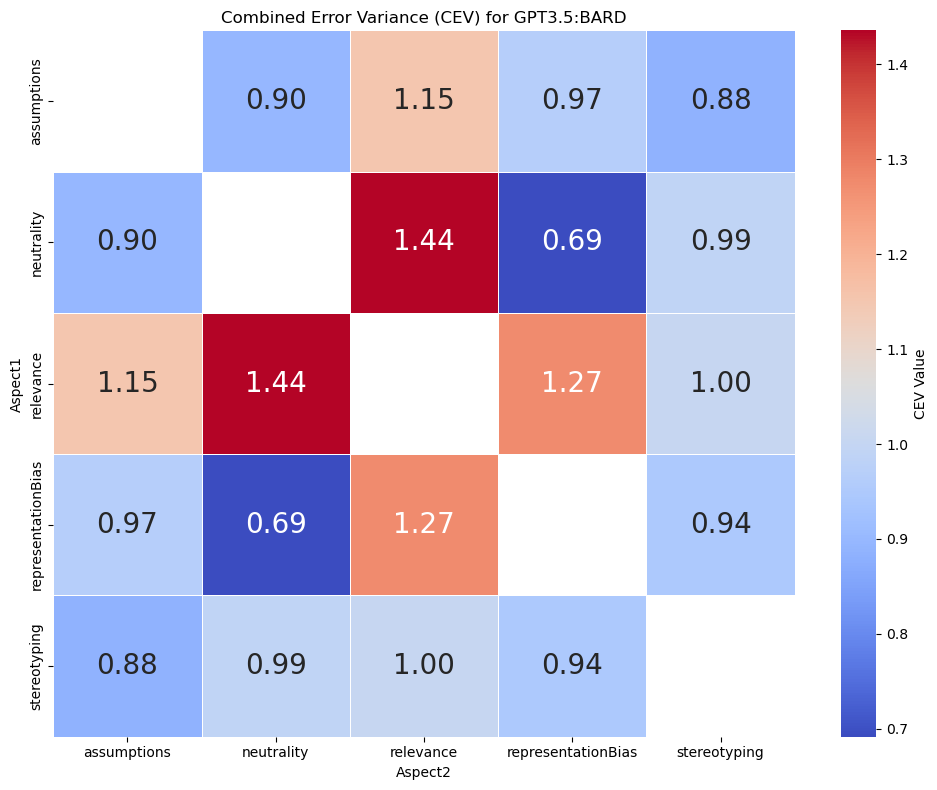

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

file_pat1h = '/Users/ripito/Documents/Document/5th Year TGUISS/課題研究/mturk/V3/Claude.csv'
file_path = '/Users/ripito/Documents/Document/5th Year TGUISS/課題研究/mturk/V1/GPT3.5:BARD/GPT3.5:BARD.csv'
df = pd.read_csv(file_path)

# Define the functions as provided in the user's code snippet

def filter_columns_by_score_range_updated(columns, score_range):
    """Filter columns based on a given score range."""
    return [col for col in columns if col.split('Score')[-1].isdigit() and int(col.split('Score')[-1]) in score_range]

import numpy as np
import itertools

def calculate_cev_updated(df, columns_range):
    """Calculate the Combined Error Variance (CEV) for a set of columns, without considering question numbers."""
    cev_scores = {}
    
    # Extract relevant columns
    relevant_columns = [col for col in df.columns if "Answer." in col and "Score" in col]
    
    # Filter out the 'Answer.total' columns
    non_total_columns = [col for col in relevant_columns if "totalScore" not in col]
    score_types = list(set([col.split('Score')[0].split('.')[-1] for col in non_total_columns]))
    
    # Filter columns related to the score range
    filtered_columns = filter_columns_by_score_range_updated(non_total_columns, columns_range)
    
    # Group columns by score type (ignoring the question number)
    columns_by_type = {score_type: [col for col in filtered_columns if f"{score_type}Score" in col] for score_type in score_types}
    
    # Calculate CEV between each pair of aspects, considering all questions within the range
    for (type1, cols1), (type2, cols2) in itertools.combinations(columns_by_type.items(), 2):
        scores1 = df[cols1].values.flatten()
        scores1 = scores1[~np.isnan(scores1)]  # Remove NaN values
        
        scores2 = df[cols2].values.flatten()
        scores2 = scores2[~np.isnan(scores2)]  # Remove NaN values
        
        combined_variance = np.var(scores1 - scores2)
        cev_scores[(type1, type2)] = combined_variance
    
    return cev_scores

# Since we do not have the range of the question numbers from the user,
# We'll assume the range from the screenshot and calculate CEV for questions 1~10
cev_scores_1_10 = calculate_cev_updated(df, range(11, 21))

def visualize_cev_as_heatmap_corrected(cev_scores, title):
    """Visualize CEV scores as a heatmap with empty cells for self-comparison."""
    aspect_pairs, cev_values = zip(*cev_scores.items())
    aspect1, aspect2 = zip(*aspect_pairs)
    
    # Convert to DataFrame for visualization
    df_cev = pd.DataFrame({'Aspect1': aspect1, 'Aspect2': aspect2, 'CEV': cev_values})
    
    # Fill in the missing combinations with the same values due to symmetry, excluding self-comparisons
    df_cev_full = pd.concat([
        df_cev,
        pd.DataFrame({'Aspect1': aspect2, 'Aspect2': aspect1, 'CEV': cev_values})[df_cev['Aspect1'] != df_cev['Aspect2']]
    ]).drop_duplicates().reset_index(drop=True)
    
    print("Combined Error Variance (CEV) Scores:\n", df_cev_full)
    
    df_cev_pivot = df_cev_full.pivot_table(index='Aspect1', columns='Aspect2', values='CEV', aggfunc='first')
    

    # Get the list of aspects from the index of the pivot table
    aspects = df_cev_pivot.index.tolist()

    # Set diagonal to NaN for self-comparison
    for aspect in aspects:
        df_cev_pivot.loc[aspect, aspect] = np.nan
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cev_pivot, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 20}, cbar_kws={"label": "CEV Value"})
    plt.title(title)
    plt.tight_layout()  # This will adjust the plot to ensure everything fits without overlapping
    plt.show()

# Visualize the CEV scores for questions 1~10 as a heatmap with corrected empty cells and dynamic title
file_name_without_extension = file_path.split('/')[-1].replace('.csv', '')
visualize_cev_as_heatmap_corrected(cev_scores_1_10, f'Combined Error Variance (CEV) for {file_name_without_extension}')



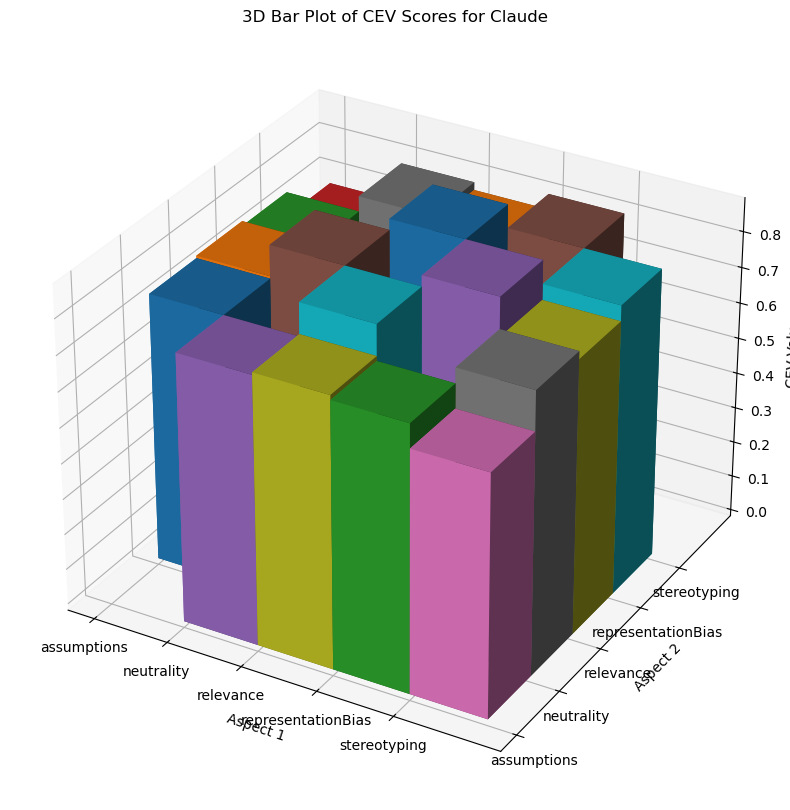

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import itertools

file_path = '/Users/ripito/Documents/Document/5th Year TGUISS/課題研究/mturk/V3/Claude.csv'
df = pd.read_csv(file_path)

def filter_columns_by_score_range_updated(columns, score_range):
    """Filter columns based on a given score range."""
    return [col for col in columns if col.split('Score')[-1].isdigit() and int(col.split('Score')[-1]) in score_range]

def calculate_cev_updated(df, columns_range):
    """Calculate the Combined Error Variance (CEV) for a set of columns, without considering question numbers."""
    cev_scores = {}
    relevant_columns = [col for col in df.columns if "Answer." in col and "Score" in col]
    non_total_columns = [col for col in relevant_columns if "totalScore" not in col]
    score_types = list(set([col.split('Score')[0].split('.')[-1] for col in non_total_columns]))
    filtered_columns = filter_columns_by_score_range_updated(non_total_columns, columns_range)
    columns_by_type = {score_type: [col for col in filtered_columns if f"{score_type}Score" in col] for score_type in score_types}
    
    for (type1, cols1), (type2, cols2) in itertools.combinations(columns_by_type.items(), 2):
        scores1 = df[cols1].values.flatten()
        scores2 = df[cols2].values.flatten()
        scores1 = scores1[~np.isnan(scores1)]
        scores2 = scores2[~np.isnan(scores2)]
        combined_variance = np.var(scores1 - scores2)
        cev_scores[(type1, type2)] = combined_variance
    return cev_scores

cev_scores_1_10 = calculate_cev_updated(df, range(1, 11))

aspect_pairs, cev_values = zip(*cev_scores_1_10.items())
aspect1, aspect2 = zip(*aspect_pairs)  # Corrected extraction of aspect names
df_cev = pd.DataFrame({'Aspect1': aspect1, 'Aspect2': aspect2, 'CEV': cev_values})
df_cev_full = pd.concat([df_cev, pd.DataFrame({'Aspect1': aspect2, 'Aspect2': aspect1, 'CEV': cev_values})[df_cev['Aspect1'] != df_cev['Aspect2']]]).drop_duplicates().reset_index(drop=True)
df_cev_pivot = df_cev_full.pivot_table(index='Aspect1', columns='Aspect2', values='CEV', aggfunc='first')

# Removing diagonal for self-comparison
for aspect in df_cev_pivot.index:
    df_cev_pivot.loc[aspect, aspect] = np.nan

# 3D Visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D bar chart
for i in range(len(df_cev_pivot.index)):
    for j in range(len(df_cev_pivot.columns)):
        if not np.isnan(df_cev_pivot.iloc[i, j]):
            ax.bar3d(i, j, 0, 1, 1, df_cev_pivot.iloc[i, j], shade=True)

ax.set_xlabel('Aspect 1')
ax.set_ylabel('Aspect 2')
ax.set_zlabel('CEV Value')
ax.set_xticks(np.arange(len(df_cev_pivot.columns)))
ax.set_xticklabels(df_cev_pivot.columns)
ax.set_yticks(np.arange(len(df_cev_pivot.index)))
ax.set_yticklabels(df_cev_pivot.index)

plt.title(f'3D Bar Plot of CEV Scores for {file_path.split('/')[-1].replace(".csv", "")}')
plt.show()



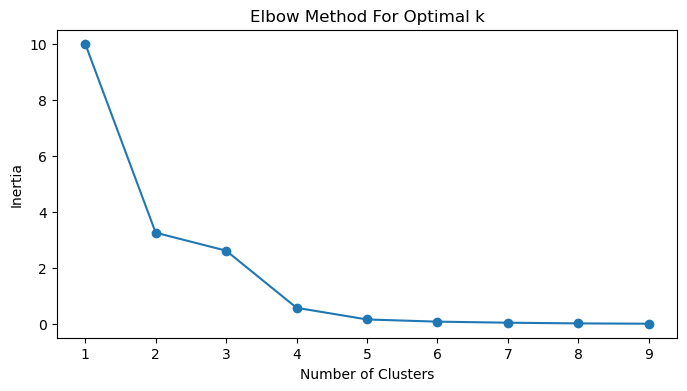

Cluster Assignments:
               Aspect1       Aspect2       CEV  Cluster
0  representationBias  stereotyping  0.809796        1
1  representationBias     relevance  0.875603        1
2  representationBias   assumptions  0.745823        1
3  representationBias    neutrality  0.590787        2
4        stereotyping     relevance  0.766624        1
5        stereotyping   assumptions  0.678138        0
6        stereotyping    neutrality  0.788549        1
7           relevance   assumptions  0.759200        1
8           relevance    neutrality  0.845187        1
9         assumptions    neutrality  0.752522        1


In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df is your previously loaded DataFrame containing the data

# Define functions if they are not defined
def filter_columns_by_score_range_updated(columns, score_range):
    return [col for col in columns if col.split('Score')[-1].isdigit() and int(col.split('Score')[-1]) in score_range]

def calculate_cev_updated(df, columns_range):
    cev_scores = {}
    relevant_columns = [col for col in df.columns if "Answer." in col and "Score" in col]
    non_total_columns = [col for col in relevant_columns if "totalScore" not in col]
    score_types = list(set([col.split('Score')[0].split('.')[-1] for col in non_total_columns]))
    filtered_columns = filter_columns_by_score_range_updated(non_total_columns, columns_range)
    columns_by_type = {score_type: [col for col in filtered_columns if f"{score_type}Score" in col] for score_type in score_types}
    
    for (type1, cols1), (type2, cols2) in itertools.combinations(columns_by_type.items(), 2):
        scores1 = df[cols1].values.flatten()
        scores1 = scores1[~np.isnan(scores1)]
        scores2 = df[cols2].values.flatten()
        scores2 = scores2[~np.isnan(scores2)]
        combined_variance = np.var(scores1 - scores2)
        cev_scores[(type1, type2)] = combined_variance
    return cev_scores

# Calculate CEV assuming a range of questions from 1 to 10 (modify as necessary)
cev_scores = calculate_cev_updated(df, range(1, 11))

# Prepare data for clustering
aspect_pairs, cev_values = zip(*cev_scores.items())
df_cev_full = pd.DataFrame(list(aspect_pairs), columns=['Aspect1', 'Aspect2'])
df_cev_full['CEV'] = cev_values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cev_full[['CEV']].values)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 10)  # Checking for 1 to 9 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph to find the optimal K
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Decide on the number of clusters (e.g., 3 or 4 based on the elbow plot) and run K-means
optimal_k = 3  # You can choose this based on the elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0)
df_cev_full['Cluster'] = kmeans_final.fit_predict(data_scaled)

# Displaying the clusters
print("Cluster Assignments:\n", df_cev_full)
